In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
dataset=pd.read_csv('telemonitoring_parkinsons_updrs.data.csv')

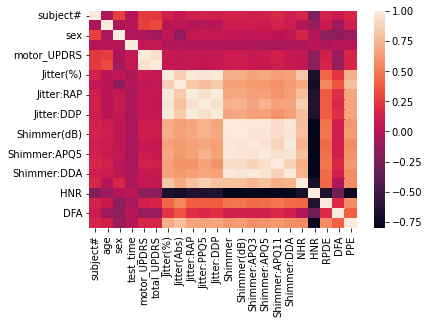

In [18]:
sns.heatmap(dataset.corr(), annot=False)

In [19]:
dataset = dataset.drop('subject#', axis=1) # Remove Subject Num
dataset = dataset.drop('motor_UPDRS', axis=1) # Remove Motor_UPDRS

In [20]:
# PPE, age, ShimmerDB, ShimmerAPQ HNR RPDE DFA PPE

# dataset = dataset[['PPE', 'age', "Shimmer(dB)", 'Shimmer:APQ11', 'HNR', 'RPDE', 'DFA', 'total_UPDRS']]

In [21]:
y=dataset['total_UPDRS']
X=dataset.loc[:,dataset.columns!="total_UPDRS"]

In [22]:
from sklearn.model_selection import train_test_split 

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [23]:
print(y_train)

4294    22.3920
1351    19.0000
5065    40.6370
3179    15.7170
2488     7.2409
         ...   
905     19.0510
5192    27.9050
3980    33.8070
235     14.9170
5157    26.2810
Name: total_UPDRS, Length: 4700, dtype: float64


In [24]:
from sklearn import tree

clf = tree.DecisionTreeRegressor()
clf.fit(x_train, y_train)

DecisionTreeRegressor()

In [25]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# sc.fit(x_train)
# x_train = sc.transform(x_train)
# x_test = sc.transform(x_test)

In [26]:
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)

accuracy_MLR_train = r2_score(y_train, y_pred_train)
print("Training Accuracy for CART R Model: ", accuracy_MLR_train)

accuracy_MLR_test = r2_score(y_test, y_pred_test)
print("Testing Accuracy for CART R Model: ", accuracy_MLR_test)

RMSE_MLR_train = sqrt(mean_squared_error(y_train, y_pred_train))
print("RMSE for Training Data: ", RMSE_MLR_train)

RMSE_MLR_test = sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE for Testing Data: ", RMSE_MLR_test)

Training Accuracy for CART R Model:  1.0
Testing Accuracy for CART R Model:  0.9380003262375718
RMSE for Training Data:  1.0763914131021936e-15
RMSE for Testing Data:  2.7368847399591525


In [27]:
predicted_value=y_pred_test
true_value=y_test

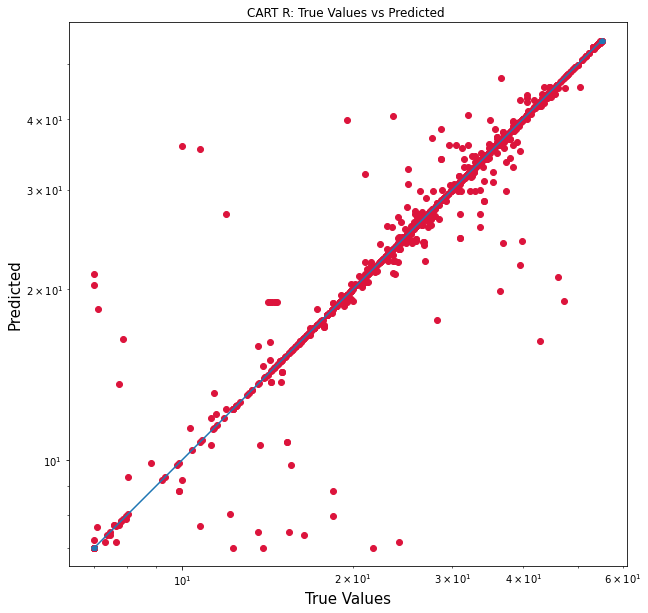

In [28]:
plt.figure(figsize=(10,10))
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'p-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("CART R: True Values vs Predicted ")
plt.axis('equal')
plt.show()